<a href="https://colab.research.google.com/github/SayimaA/MSProject/blob/master/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch.nn.functional as F
#import torchsampler
import time

from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import WeightedRandomSampler

In [ ]:

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
batch=20
data_transform = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(60),
                                      transforms.RandomAffine(0, shear=10, scale=(1.2,1.2)),
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                      ])


In [ ]:
cd ..

/


In [ ]:
data_path = 'content/gdrive/My Drive/Chest_Xray/'
classes = ['NORMAL', 'PNEUMONIA']

In [ ]:
def weights_balanced(images, nclasses):                        
    count = [0] * nclasses                                                      
    for item in images:                                                         
        count[item[1]] += 1                                                     
    weight_per_class = [0.] * nclasses                                      
    N = float(sum(count))                                                   
    for i in range(nclasses):                                                   
        weight_per_class[i] = N/float(count[i])                                 
    weight = [0] * len(images)                                              
    for idx, val in enumerate(images):                                          
        weight[idx] = weight_per_class[val[1]]                                  
    return weight    






train_dataset = datasets.ImageFolder(data_path + '/train', transform=data_transform)
                                                                                                                                                   

weights = weights_balanced(train_dataset.imgs, len(train_dataset.classes))                                                             
train_weights = torch.DoubleTensor(weights)            
#print(train_weights)                           
train_weight_sampler = torch.utils.data.sampler.WeightedRandomSampler(train_weights, len(train_weights))                     
#print(train_weight_sampler)                                                                              
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch,sampler = train_weight_sampler)     


In [ ]:
test_data = datasets.ImageFolder(data_path + '/test', transform=data_transform) 


weights = weights_balanced(test_data.imgs, len(test_data.classes))                                                                
test_weights = torch.DoubleTensor(weights) 
                                      
test_weight_sampler = torch.utils.data.sampler.WeightedRandomSampler(test_weights, len(test_weights))  

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch, shuffle=False, sampler = test_weight_sampler)

In [ ]:
validation_data = datasets.ImageFolder(data_path + '/valid', transform=data_transform) 


weights = weights_balanced(validation_data.imgs, len(validation_data.classes))                                                                
validation_weights = torch.DoubleTensor(weights)             
#print(validation_weights)                          
validation_weight_sampler = torch.utils.data.sampler.WeightedRandomSampler(validation_weights, len(validation_weights))  

validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=batch, shuffle=False,sampler=validation_weight_sampler)

#print(len(validation_loader.dataset))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

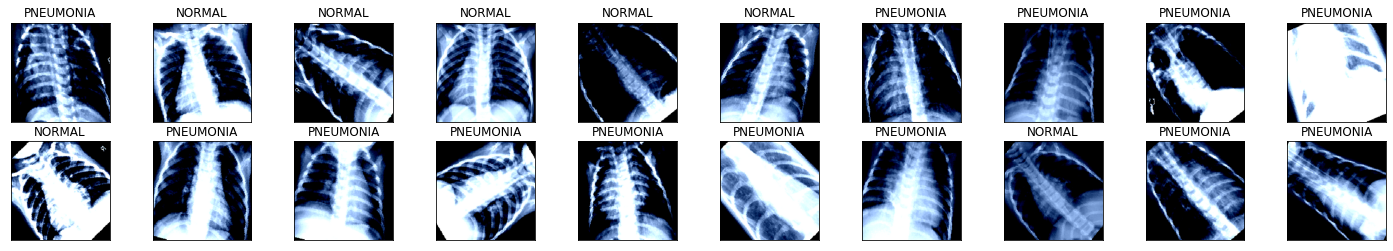

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [ ]:
model_vgg = models.vgg16(pretrained=True)

print(model_vgg) #print out the model structure

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [ ]:
#Freezing the weights and training of all other layers except the last one
for layers in model_vgg.features.parameters():
  layers.requires_grad=False

  import torch.nn as nn


model_vgg.classifier = nn.Sequential(nn.Linear(in_features=25088, out_features=4096, bias=True), 
                                     nn.ReLU(inplace=True),
                                     nn.Dropout(p=0.5, inplace=False),
                                     nn.Linear(in_features=4096, out_features=4096, bias=True),
                                     nn.ReLU(inplace=True),
                                     nn.Dropout(p=0.5, inplace=False),
                                     nn.Linear(in_features=4096, out_features=len(classes), bias=True), 
                                     nn.LogSoftmax(dim=1))

if train_on_gpu:
    model_vgg.cuda()

#print(model_vgg)



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_vgg.classifier.parameters(), lr=0.005, momentum = 0.5)

In [ ]:
n_epochs = 30

min_val_loss = np.Inf
j=0

for epoch in range(1, n_epochs+1):

    train_loss = 0.0
    valid_loss = 0.0
   
    model_vgg.train()
    for data, target in train_loader:

        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        optimizer.zero_grad()
        
        output = model_vgg(data)
       
        loss = criterion(output, target) 
        loss.backward() 
        optimizer.step()
        
        train_loss += loss.item()*data.size(0)


        # if batch_i % 20 == 19:    # print training loss every specified number of mini-batches
        #     print('Epoch %d, Batch %d loss: %.16f' %
        #           (epoch, batch_i + 1, train_loss / 20))
        #     train_loss = 0.0


    #validating the model

    model_vgg.eval()
    for data, target in validation_loader:
        if train_on_gpu:
          data, target = data.cuda(), target.cuda()

        output = model_vgg(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)

    #calculating the train loss and valid loss, averge of loss of the two
    avg_train_loss = train_loss/len(train_loader.dataset)
    avg_valid_loss = valid_loss/len(validation_loader.dataset)

    # print training/validation statistics 
    # t0 = time.time()
    # print('{} seconds'.format(time.time() - t0))
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, avg_train_loss, avg_valid_loss))
     
    
    if avg_valid_loss <= min_val_loss:
      j+=1
      print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format( min_val_loss, avg_valid_loss))
      model_vgg_path = data_path + "model_pneumonia{}.pt".format(j)
      torch.save(model_vgg.state_dict(), model_vgg_path)
      min_val_loss = avg_valid_loss

      
model_vgg.load_state_dict(torch.load(model_vgg_path))

Epoch: 1 	Training Loss: 0.307286 	Validation Loss: 3.256202
Validation loss decreased (inf --> 3.256202).  Saving model ...
Epoch: 2 	Training Loss: 0.237218 	Validation Loss: 0.103478
Validation loss decreased (3.256202 --> 0.103478).  Saving model ...
Epoch: 3 	Training Loss: 0.168487 	Validation Loss: 0.160039
Epoch: 4 	Training Loss: 0.167785 	Validation Loss: 0.168095
Epoch: 5 	Training Loss: 0.158625 	Validation Loss: 0.125661
Epoch: 6 	Training Loss: 0.154664 	Validation Loss: 0.087209
Validation loss decreased (0.103478 --> 0.087209).  Saving model ...
Epoch: 7 	Training Loss: 0.133999 	Validation Loss: 0.117044
Epoch: 8 	Training Loss: 0.138410 	Validation Loss: 0.096268
Epoch: 9 	Training Loss: 0.122997 	Validation Loss: 0.134048
Epoch: 10 	Training Loss: 0.129364 	Validation Loss: 0.102405
Epoch: 11 	Training Loss: 0.115207 	Validation Loss: 0.054837
Validation loss decreased (0.087209 --> 0.054837).  Saving model ...
Epoch: 12 	Training Loss: 0.125571 	Validation Loss: 0.0

<All keys matched successfully>

In [ ]:
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

model_vgg.eval()
i=1

for data, target in test_loader:
    i=i+1
    if len(target)!=batch:
        continue

    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
   
    output = model_vgg(data)
    
    loss = criterion(output, target)
   
    test_loss += loss.item()*data.size(0)
   
    _, pred = torch.max(output, 1)    
    
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.data.cpu().numpy())
    
    for i in range(batch):       
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.427990

Test Accuracy of NORMAL: 76% (243/319)
Test Accuracy of PNEUMONIA: 97% (292/301)

Test Accuracy (Overall): 86% (535/620)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
       device='cuda:0')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

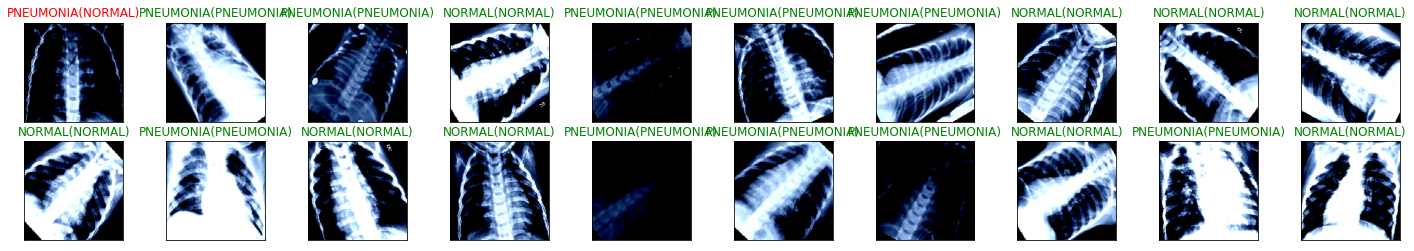

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# print(type(images))

# get sample outputs
output = model_vgg(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
print(preds_tensor)

preds = np.squeeze(preds_tensor.data.cpu().numpy())

#print(preds)


# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx].cpu(), (1, 2, 0)))
    ax.set_title("{}({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))
